# L'algoritmo di Bernstein-Vazirani

L'input dell'algoritmo è una funzione $f(n)$

$$
f:\{0,1\}^n \to \{0,1\}
$$

La funzione, per ipotesi, è definita nel seguente modo

$$
f(x) = x \cdot s \mod 2 
$$

Con $s$ una stringa di lunghezza $n$. L'input $x$ sarà della stessa lunghezza. L'obiettivo dell'algoritmo è ottenere $s$ a partire da $f(x)$. È dimostrabile che il numero di controlli da fare con una strategia classica è un $O(n)$.

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from BoredQiskit import FastQiskit as fq
from BoredQiskit import FastOracles as fo

### Costruire l'oracolo

Osserviamo che la funzione $f(x)$, con $X = x_1x_2\dots x_{n-1}$ e $S = s_1s_2\dots s_{n-1}$



$$
f(X) = x_0s_0 \oplus x_1s_1 \oplus \dots \oplus x_{n-1}s_{n-1}
$$

    
Quando $s_i = 0$, anche $x_is_i = 0 \Rightarrow$ l'$i$-esimo termine non influisce più sul conto dello $XOR$ complessivo.

Abbiamo creato una funzione per costruire l'oracolo dell'algoritmo di Bernstein-Varizani, a partire dalla stringa $S$.

---
```py
def bernstein_vazirani_oracle(s: str):
    """
    generates the oracle of the bernstein varizani circuit
    given a `s` string 
    """
    n = len(s)
    xr = QuantumRegister(n,'x')
    yr = QuantumRegister(1,'out')
    qc = QuantumCircuit(xr, yr)    
    
    for c, i in enumerate(s, 0):
        if i == '1':
            qc.cx(n-c-1,yr)
    qc = qc.to_gate(label='  oracle  ')
    
    return qc
```
---

Oracolo e misurazione finale a parte, il codice è lo stesso dell'algoritmo di Deutsch-Jozsa!

In [7]:
def bernstein_vazirani(s: str):
    n = len(s)
    U = fo.bernstein_vazirani_oracle(s)
    qx = QuantumRegister(n, 'x')
    qy = QuantumRegister(1, 'y')
    c = ClassicalRegister(n, 'c')

    qc = QuantumCircuit(qx,qy,c)
    qc.initialize([0,-1], qy)
    qc.barrier(label='init')

    qc.h(qx)
    qc.h(qy)
    qc = qc.compose(U)

    qc.h(range(n))

    qc.measure(range(n), c)
    return qc


Testiamo adesso il circuito.

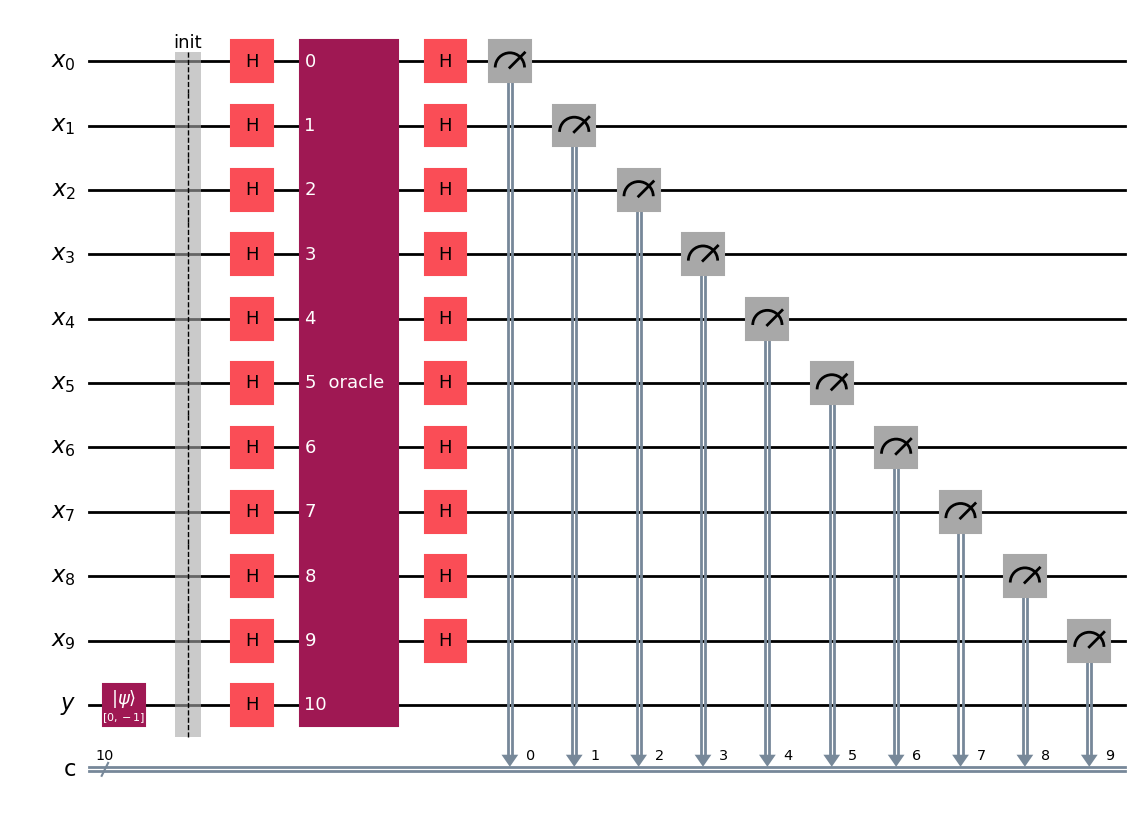

In [8]:
S = '1010100101'
qc = bernstein_vazirani(S)
qc.draw('mpl')

Vediamo che l'output finale coincide con la stringa data come input.

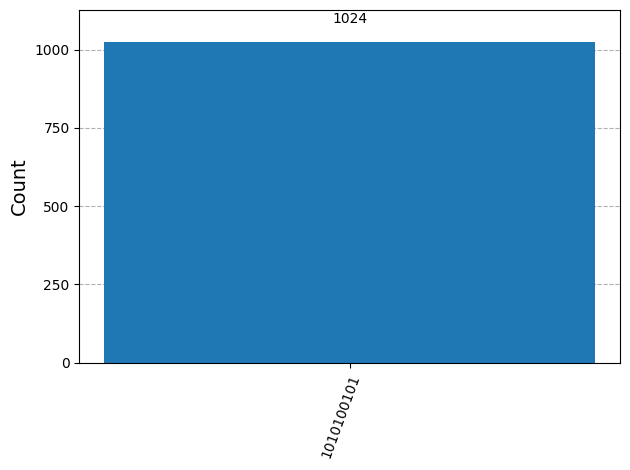

In [9]:
counts = fq.run(qc,1024)
plot_histogram(counts)

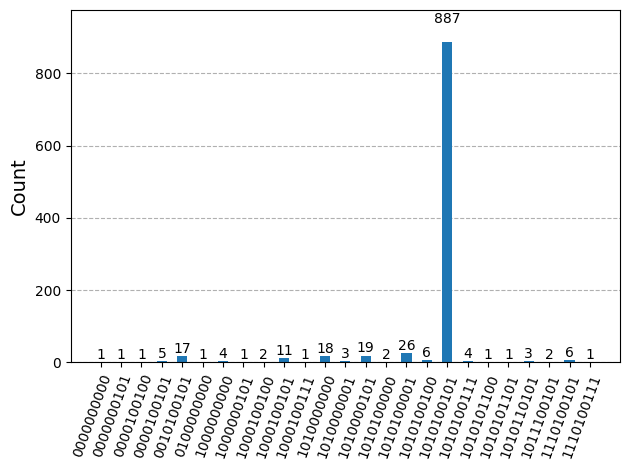

In [10]:
counts = fq.torino_run(qc,1024)
plot_histogram(counts)